<a href="https://colab.research.google.com/github/krishnendu-04/Datathon_paddyleaf/blob/main/Datathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where the files are stored in Google Drive
data_path = '/content/drive/MyDrive/Datathon/'

# List the files in the folder to ensure the correct path
os.listdir(data_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['metadata.csv',
 'paddy-doctor-diseases-small-augmented-26k.zip',
 'paddy_classifier.h5',
 'paddy-doctor-diseases.zip']

In [2]:
# Path to the zip file
zip_file_path = os.path.join(data_path, 'paddy-doctor-diseases.zip')

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the extracted files
os.listdir('/content/dataset')


['metadata.csv',
 'yellow_stem_borer',
 'blast',
 'bacterial_panicle_blight',
 'downy_mildew',
 'white_stem_borer',
 'hispa',
 'brown_spot',
 'bacterial_leaf_streak',
 'bacterial_leaf_blight',
 'normal',
 'tungro',
 'black_stem_borer',
 'leaf_roller']

In [3]:
import pandas as pd

# Load metadata
metadata_path = os.path.join(data_path, 'metadata.csv')
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the metadata
metadata.head()


,image_id,label,variety,age
0,PDD00001.jpg,bacterial_leaf_blight,45,65
1,PDD00002.jpg,bacterial_leaf_blight,45,60
2,PDD00003.jpg,bacterial_leaf_blight,45,55
3,PDD00004.jpg,bacterial_leaf_blight,KarnatakaPonni,50
4,PDD00005.jpg,bacterial_leaf_blight,45,72


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing the images
image_dir = '/content/dataset/'

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 12983 images belonging to 13 classes.
Found 3242 images belonging to 13 classes.


In [5]:
model = tf.keras.models.Sequential([
    # Define your model architecture here
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Add more layers as needed
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


406/406 ━━━━━━━━━━━━━━━━━━━━ 206s 486ms/step - accuracy: 0.2215 - loss: 6.1206 - val_accuracy: 0.4414 - val_loss: 1.7507
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 248s 461ms/step - accuracy: 0.6134 - loss: 1.2302 - val_accuracy: 0.6070 - val_loss: 1.3006
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 178s 405ms/step - accuracy: 0.9255 - loss: 0.3064 - val_accuracy: 0.6169 - val_loss: 1.4304
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 179s 437ms/step - accuracy: 0.9924 - loss: 0.0618 - val_accuracy: 0.6622 - val_loss: 1.4265
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 165s 401ms/step - accuracy: 0.9993 - loss: 0.0161 - val_accuracy: 0.6555 - val_loss: 1.5397
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 197s 387ms/step - accuracy: 0.9975 - loss: 0.0192 - val_accuracy: 0.6632 - val_loss: 1.5236
Epoch 7/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 201s 384ms/step - accuracy: 0.9986 - loss: 0.0107 - val_accuracy: 0.6533 - val_loss: 1.6941
Epoch 8/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 162s 395ms/step - accuracy: 0.9996 - loss: 0.00

In [6]:
# Save the model
model.save('/content/drive/MyDrive/Datathon/paddy_classifier.h5')

# Evaluate the model
model.evaluate(validation_generator)


102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.5462 - loss: 2.7570


[2.6384541988372803, 0.5589142441749573]

In [9]:
from sklearn.metrics import classification_report

def display_classification_report(model, generator):
    true_labels = generator.classes
    predictions = model.predict(generator)
    predicted_labels = np.argmax(predictions, axis=1)

    # Print classification report
    report = classification_report(true_labels, predicted_labels, target_names=generator.class_indices.keys())
    print(report)

# Call the function with your model and validation generator
display_classification_report(model, validation_generator)


102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 321ms/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.01      0.01      0.01       129
   bacterial_leaf_streak       0.05      0.02      0.03       101
bacterial_panicle_blight       0.02      0.01      0.01        90
        black_stem_borer       0.05      0.03      0.04       101
                   blast       0.12      0.12      0.12       470
              brown_spot       0.06      0.02      0.03       251
            downy_mildew       0.05      0.03      0.04       173
                   hispa       0.15      0.17      0.16       430
             leaf_roller       0.07      0.07      0.07       219
                  normal       0.15      0.34      0.21       481
                  tungro       0.09      0.03      0.05       390
        white_stem_borer       0.11      0.11      0.11       254
       yellow_stem_borer       0.04      0.03      0.03       153

                accuracy      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


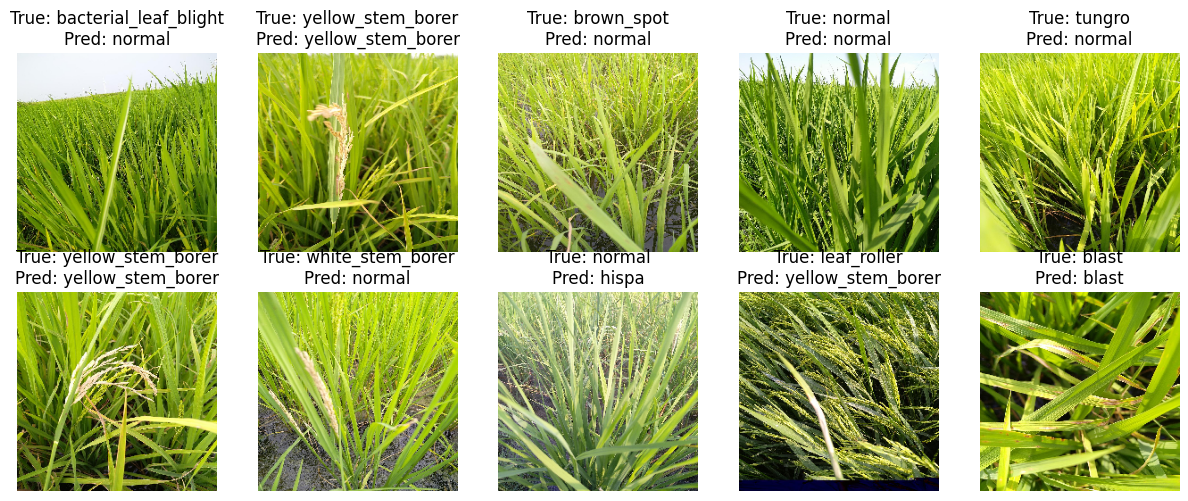

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, generator, num_images=10):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Predict the labels for the batch of images
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Get class labels
    class_labels = list(generator.class_indices.keys())

    # Plot the images with predicted and true labels
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Call the function with your model and validation/test generator
visualize_predictions(model, validation_generator, num_images=10)
